In [ ]:
# Common data science libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Modelling libraries 

import optuna
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures

# Algorithm libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, Perceptron
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


def plot_pairwise_boundaries(X, y, clf, feature_names=None):
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    
    # Get all pairwise combinations of features
    feature_pairs = list(combinations(range(X.shape[1]), 2))
    
    fig, axes = plt.subplots(1, len(feature_pairs), figsize=(15, 5))
    if len(feature_pairs) == 1:
        axes = [axes]
    
    for idx, (i, j) in enumerate(feature_pairs):
        print ("PRUEBA") 
        print([idx, i, j])
        # Extract 2D data
        X_2d = X.iloc[:, [i, j]]
        
        # Train classifier on 2D data
        clf_2d = type(clf)(**clf.get_params())
        clf_2d.fit(X_2d, y)
        
        # Create decision boundary
        h = 0.02
        x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
        y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = clf_2d.predict(mesh_points)
        Z = Z.reshape(xx.shape)
        
        # Plot
        axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        scatter = axes[idx].scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y, cmap='viridis')
        axes[idx].set_xlabel(feature_names[i])
        axes[idx].set_ylabel(feature_names[j])
        axes[idx].set_title(f'{feature_names[i]} vs {feature_names[j]}')
    
    plt.tight_layout()
    plt.show()

df_train = pd.read_csv("training.csv")[["Temperatura", "pH", "Bw", "Crec"]]
df_validation = pd.read_csv("validation.csv")[["Temperatura", "pH", "Bw", "Crec"]]
df = pd.concat([df_train,df_validation])

X = df.drop("Crec", axis=1)
y = df["Crec"]

X_train, X_test, y_train, y_test = train_test_split(
                df.drop("Crec", axis=1),
                df["Crec"],
                train_size = 0.8,
                random_state = 123,
                shuffle = True
            )

cv = RepeatedKFold(n_splits = 5, n_repeats=2, random_state=123)


# Logistic Regression

/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-07-10 13:25:44,793] A new study created in memory with name: no-name-c533f159-4b04-43b6-aca8-6ba5b496f88c


      Crec  Temperatura   pH        Bw  Temperatura^2  Temperatura pH  \
0      1.0          8.0  7.5  0.031623           64.0            60.0   
1      1.0          8.0  7.5  0.031623           64.0            60.0   
2      1.0          8.0  7.5  0.031623           64.0            60.0   
3      1.0          8.0  7.5  0.031623           64.0            60.0   
4      1.0          8.0  7.5  0.031623           64.0            60.0   
...    ...          ...  ...       ...            ...             ...   
8605   1.0         19.0  5.0  0.379473          361.0            95.0   
8606   1.0         19.0  5.0  0.379473          361.0            95.0   
8607   1.0         19.0  5.0  0.379473          361.0            95.0   
8608   1.0         19.0  5.0  0.379473          361.0            95.0   
8609   1.0         19.0  5.0  0.379473          361.0            95.0   

      Temperatura Bw   pH^2     pH Bw   Bw^2  
0           0.252982  56.25  0.237171  0.001  
1           0.252982  56.25  

/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-07-10 13:25:45,439] Trial 0 finished with value: 0.8618609768023036 and parameters: {'C': 0.48253767947262893, 'penalty': 'l2', 'max_iter': 796, 'class_weight': None}. Best is trial 0 with value: 0.8618609768023036.
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-07-10 13:25:46,967] Trial 1 finished with value: 0.8588471777041343 and parameters: {'C': 1103.791211183123, 'penalty': 'l2', 'max_iter': 1877, 'class_weight': None}. Best is trial 0 with value: 0.8618609768023036.
[I 2025-07-10 13:25:47,834] Trial 2 finished with value: 0.8602936382897809 and parameters: {'C': 0.017297866

Mejores hiperparámetros: {'C': 0.056064453095855935, 'penalty': 'l2', 'max_iter': 629, 'class_weight': None}
Mejor score: 0.8628375074699842
PRUEBA
[0, 0, 1]
PRUEBA
[1, 0, 2]
PRUEBA
[2, 1, 2]


/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


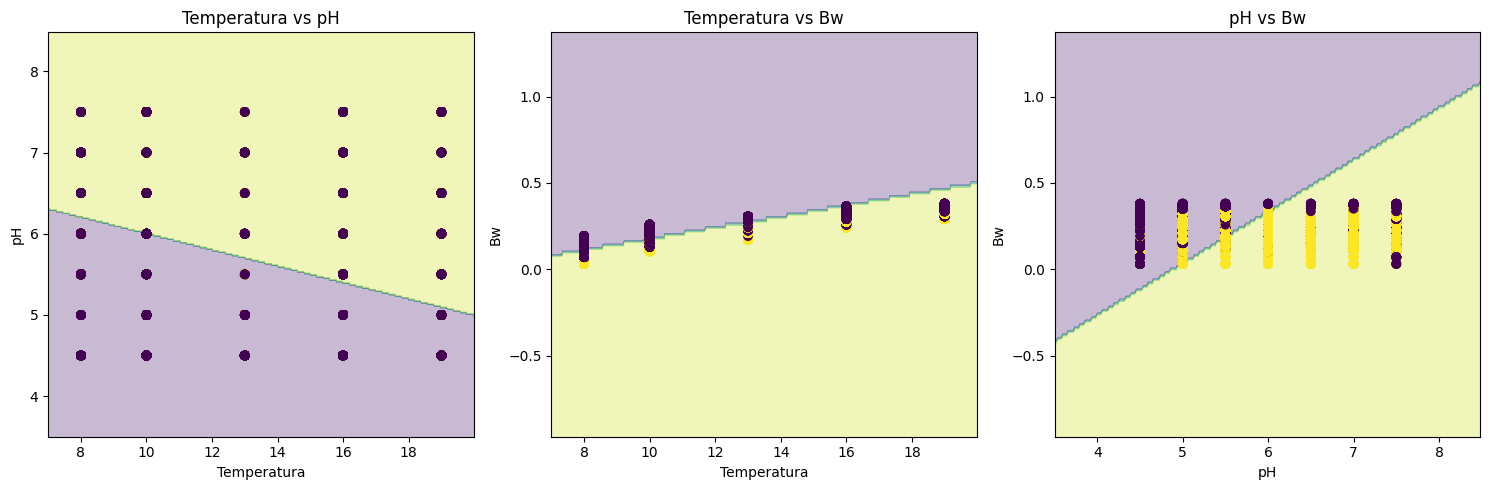

In [ ]:
poly = PolynomialFeatures(degree=2)

X_poly = pd.DataFrame(poly.fit_transform(df.drop("Crec", axis=1)), columns =  poly.get_feature_names_out(["Temperatura", "pH", "Bw"]))
X_poly.rename(columns={"1":"Crec"}, inplace = True)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
                X_poly,
                df["Crec"],
                train_size = 0.8,
                random_state = 123,
                shuffle = True
            )

def objective(trial):
        params = {
                "C" : trial.suggest_float('C', 1e-4, 1e4, log=True),
                "penalty" : trial.suggest_categorical('penalty', ['l1', 'l2']),
                "max_iter" : trial.suggest_int('max_iter', 500, 2000),
                "class_weight" : trial.suggest_categorical('class_weight', [None, 'balanced'])
            }


        model = LogisticRegression(
                solver = "saga",
                **params
                )

        model.fit(X_poly_train, y_poly_train)
        predictions = model.predict(X_poly_test)
        score = roc_auc_score(y_poly_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = LogisticRegression(
                solver = "saga",
                **study.best_params)

cv_scores_LogR = cross_validate(model_best, 
                               X = df.drop("Crec", axis=1),
                               y = df["Crec"], 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True,   
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

plot_pairwise_boundaries(df.drop("Crec", axis=1), df["Crec"], cv_scores_LogR["estimator"][7], feature_names=["Temperatura", "pH", "Bw"])


In [4]:
### MultinomialNB

def objective(trial):
        params = {
                "alpha" : trial.suggest_float('alpha', 0.01, 10.0, log=True),
                "fit_prior" : trial.suggest_categorical('fit_prior', [True, False])
                }

        model = MultinomialNB(
                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = MultinomialNB(
                **study.best_params)

cv_scores_NB = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True, 
                               return_indices = True,
                               return_train_score = True
                               )

cv_scores_NB["test_roc_auc"], cv_scores_NB["test_accuracy"]

[I 2025-07-08 11:51:54,005] A new study created in memory with name: no-name-fcf1b040-2ac8-41ef-b253-14892bb43d81
[I 2025-07-08 11:51:54,013] Trial 0 finished with value: 0.5 and parameters: {'alpha': 3.4290791795138946, 'fit_prior': True}. Best is trial 0 with value: 0.5.
[I 2025-07-08 11:51:54,020] Trial 1 finished with value: 0.5 and parameters: {'alpha': 0.08645294468482399, 'fit_prior': True}. Best is trial 0 with value: 0.5.
[I 2025-07-08 11:51:54,027] Trial 2 finished with value: 0.538065681534199 and parameters: {'alpha': 1.656690224460768, 'fit_prior': False}. Best is trial 2 with value: 0.538065681534199.
[I 2025-07-08 11:51:54,033] Trial 3 finished with value: 0.5 and parameters: {'alpha': 1.0753654008997313, 'fit_prior': True}. Best is trial 2 with value: 0.538065681534199.
[I 2025-07-08 11:51:54,039] Trial 4 finished with value: 0.5 and parameters: {'alpha': 0.36470684095282463, 'fit_prior': True}. Best is trial 2 with value: 0.538065681534199.


Mejores hiperparámetros: {'alpha': 1.656690224460768, 'fit_prior': False}
Mejor score: 0.538065681534199


(array([0.59074876, 0.55167141, 0.55075235, 0.60917819, 0.58803348,
        0.60737016, 0.57992699, 0.55258165, 0.57839797, 0.5730116 ]),
 array([0.53890825, 0.4970964 , 0.50058072, 0.55168409, 0.53135889,
        0.54936121, 0.51103368, 0.50522648, 0.5261324 , 0.52206736]))

In [ ]:
## Perceptron

def objective(trial):
        params = {
                "penalty" : trial.suggest_categorical('penalty', [None, 'l2', 'l1']),
                "eta0" : trial.suggest_float('eta0', 1e-3, 1e-1, log=True),
                "max_iter" : trial.suggest_int('max_iter', 1000, 2000),
                "class_weight" : trial.suggest_categorical('class_weight', [None, 'balanced'])
                }

        model = Perceptron(

                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = Perceptron(
                n_jobs = -1,
                random_state = 123,
                verbose = 0,
                **study.best_params)

cv_scores_Perceptron = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True, 
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_Perceptron["test_roc_auc"], cv_scores_Perceptron["test_accuracy"]


[I 2025-07-08 12:00:54,617] A new study created in memory with name: no-name-2bac192d-888f-44c1-be6f-82bcb732524b
[I 2025-07-08 12:00:54,629] Trial 0 finished with value: 0.6788124083229207 and parameters: {'penalty': 'l2', 'eta0': 0.015674178529783145, 'max_iter': 1951, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6788124083229207.
[I 2025-07-08 12:00:54,642] Trial 1 finished with value: 0.7333093388384854 and parameters: {'penalty': None, 'eta0': 0.05527896904350483, 'max_iter': 1763, 'class_weight': None}. Best is trial 1 with value: 0.7333093388384854.
[I 2025-07-08 12:00:54,655] Trial 2 finished with value: 0.8218490248275112 and parameters: {'penalty': 'l1', 'eta0': 0.0073437166292585525, 'max_iter': 1588, 'class_weight': None}. Best is trial 2 with value: 0.8218490248275112.
[I 2025-07-08 12:00:54,665] Trial 3 finished with value: 0.610759493670886 and parameters: {'penalty': 'l2', 'eta0': 0.09933013521119062, 'max_iter': 1136, 'class_weight': None}. Best is trial 

Mejores hiperparámetros: {'penalty': 'l1', 'eta0': 0.0073437166292585525, 'max_iter': 1588, 'class_weight': None}
Mejor score: 0.8218490248275112


(array([0.89451771, 0.86493529, 0.85571524, 0.86168857, 0.87766137,
        0.88313345, 0.88609956, 0.89480214, 0.87837668, 0.8689123 ]),
 array([0.79094077, 0.71660859, 0.7224158 , 0.51916376, 0.80255517,
        0.47619048, 0.75493612, 0.74912892, 0.60162602, 0.7775842 ]))

In [16]:
## SGDClassifier

def objective(trial):
        params = {
                "loss" : trial.suggest_categorical('loss', ['hinge', 'log_loss', 'modified_huber']),
                "penalty" : trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
                "alpha" : trial.suggest_float('alpha', 1e-6, 1e-1, log=True),
                "max_iter" : trial.suggest_int('max_iter', 500, 2000),
                "tol" : trial.suggest_float('tol', 1e-5, 1e-2, log=True)
                }

        model = SGDClassifier(

                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = SGDClassifier(
                n_jobs = -1,
                random_state = 123,
                verbose = 0,
                **study.best_params)

cv_scores_SGD = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True, 
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_SGD["test_roc_auc"], cv_scores_SGD["test_accuracy"]


[I 2025-07-08 12:17:59,536] A new study created in memory with name: no-name-9a1bf093-33c0-4c46-a1e3-7f5131ccc18b
[I 2025-07-08 12:17:59,557] Trial 0 finished with value: 0.7932770141793883 and parameters: {'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.006623692633240774, 'max_iter': 1011, 'tol': 7.608275875461237e-05}. Best is trial 0 with value: 0.7932770141793883.
[I 2025-07-08 12:17:59,618] Trial 1 finished with value: 0.6394333677405335 and parameters: {'loss': 'log_loss', 'penalty': 'l2', 'alpha': 2.852191872027492e-05, 'max_iter': 1703, 'tol': 0.0019471979418130205}. Best is trial 0 with value: 0.7932770141793883.
[I 2025-07-08 12:17:59,653] Trial 2 finished with value: 0.5841772151898734 and parameters: {'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 4.4232737985439285e-05, 'max_iter': 952, 'tol': 0.003031552062383446}. Best is trial 0 with value: 0.7932770141793883.
[I 2025-07-08 12:17:59,686] Trial 3 finished with value: 0.7415602759819633 and parameters: 

Mejores hiperparámetros: {'loss': 'modified_huber', 'penalty': 'l1', 'alpha': 0.003047168267625794, 'max_iter': 1520, 'tol': 0.000123858115693597}
Mejor score: 0.8180814364100613


(array([0.89859904, 0.88836691, 0.88790175, 0.88660748, 0.88923058,
        0.88631024, 0.89540259, 0.9014326 , 0.88872647, 0.87917415]),
 array([0.82462253, 0.80894309, 0.80778165, 0.79384437, 0.79965157,
        0.80952381, 0.79616725, 0.81881533, 0.80023229, 0.80429733]))

In [17]:
## PassiveAgressive

def objective(trial):
        params = {
                "C" : trial.suggest_float('C', 1e-4, 1e2, log=True),
                "loss" : trial.suggest_categorical('loss', ['hinge', 'squared_hinge']),
                "max_iter" : trial.suggest_int('max_iter', 500, 2000),
                "tol" : trial.suggest_float('tol', 1e-5, 1e-2, log=True),
                "fit_intercept" : trial.suggest_categorical('fit_intercept', [True, False]),
                "shuffle" : trial.suggest_categorical('shuffle', [True, False]),
                "class_weight" : trial.suggest_categorical('class_weight', [None, 'balanced']),
                "average" : trial.suggest_categorical('average', [False, True])
                }

        model = PassiveAggressiveClassifier(

                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = PassiveAggressiveClassifier(
                n_jobs = -1,
                random_state = 123,
                verbose = 0,
                **study.best_params)

cv_scores_PAC = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True, 
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_PAC["test_roc_auc"], cv_scores_PAC["test_accuracy"]

[I 2025-07-08 12:18:02,689] A new study created in memory with name: no-name-02403117-4b4d-49fc-9b36-3405e3141f86
[I 2025-07-08 12:18:02,717] Trial 0 finished with value: 0.6451159884826425 and parameters: {'C': 0.4350741871525556, 'loss': 'hinge', 'max_iter': 1584, 'tol': 0.00025564510336098084, 'fit_intercept': False, 'shuffle': False, 'class_weight': None, 'average': False}. Best is trial 0 with value: 0.6451159884826425.
[I 2025-07-08 12:18:02,742] Trial 1 finished with value: 0.7979301352746239 and parameters: {'C': 0.05413042272923763, 'loss': 'hinge', 'max_iter': 1997, 'tol': 0.0010265706371185843, 'fit_intercept': True, 'shuffle': False, 'class_weight': 'balanced', 'average': True}. Best is trial 1 with value: 0.7979301352746239.
[I 2025-07-08 12:18:02,758] Trial 2 finished with value: 0.7100899114467323 and parameters: {'C': 41.09726088984274, 'loss': 'hinge', 'max_iter': 1684, 'tol': 0.007311428018362401, 'fit_intercept': True, 'shuffle': True, 'class_weight': 'balanced', 'av

Mejores hiperparámetros: {'C': 0.05097242286226354, 'loss': 'squared_hinge', 'max_iter': 554, 'tol': 0.0004599909494908259, 'fit_intercept': True, 'shuffle': False, 'class_weight': None, 'average': True}
Mejor score: 0.8019693594828055


(array([0.55470949, 0.52506978, 0.5245355 , 0.56661736, 0.55319555,
        0.56741389, 0.54773348, 0.5258782 , 0.54535863, 0.53927541]),
 array([0.49303136, 0.46980256, 0.48083624, 0.5174216 , 0.50116144,
        0.50929152, 0.48490128, 0.470964  , 0.49941928, 0.49767712]))

In [11]:
## MLPClassifier

def objective(trial):
        params = {
                "hidden_layer_sizes" : trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (100, 50), (200, 100)]),
                "alpha" : trial.suggest_float('alpha', 1e-6, 1e-1, log=True),
                "learning_rate_init" : trial.suggest_float('learning_rate_init', 1e-5, 1e-1, log=True),
                "activation" : trial.suggest_categorical('activation', ['relu', 'tanh']),
                "solver" : trial.suggest_categorical('solver', ['adam', 'lbfgs'])
                }

        model = MLPClassifier(
                random_state   = 123,
                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = MLPClassifier(
                random_state = 123,
                **study.best_params)

cv_scores_MLP = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True, 
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_MLP["test_roc_auc"], cv_scores_MLP["test_accuracy"]


[I 2025-07-08 12:06:48,935] A new study created in memory with name: no-name-d7a2f8cc-7b10-4c6e-a151-d149c8951f07
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 5

Mejores hiperparámetros: {'hidden_layer_sizes': (200, 100), 'alpha': 0.00021617680771390588, 'learning_rate_init': 0.00012019806022796815, 'activation': 'tanh', 'solver': 'lbfgs'}
Mejor score: 0.9117713369913619


/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:601: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:601: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter

(array([0.96908038, 0.96059432, 0.96483889, 0.96426929, 0.96902458,
        0.96989393, 0.9725621 , 0.96664508, 0.96395249, 0.96221487]),
 array([0.91637631, 0.89547038, 0.89837398, 0.90011614, 0.91056911,
        0.91405343, 0.91231127, 0.89663182, 0.89837398, 0.89140534]))

In [22]:
### XGB training

def objective(trial):
        params = {
                'n_estimators': trial.suggest_int('n_estimators', 1000, 100000, step=10),
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 5),
                'learning_rate': trial.suggest_float('learning_rate', 0.00001, 0.01),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0001, 0.1, log=True),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0001, 0.1, log=True),
                'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1),
                'subsample': trial.suggest_float('subsample', 0.1, 1),
                }

        model = XGBClassifier(
                n_jobs         = -1,
                random_state   = 123,
                verbosity            = 0,
                enable_categorical = True,
                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = XGBClassifier(
                n_jobs = -1,
                random_state = 123,
                verbose = 0,
                **study.best_params)

cv_scores_XGB = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True, 
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_XGB["test_roc_auc"], cv_scores_XGB["test_accuracy"]


[I 2025-07-02 13:47:58,058] A new study created in memory with name: no-name-8dfe2e63-789e-41b2-838c-c8dadef937cd
[I 2025-07-02 13:48:21,256] Trial 0 finished with value: 0.939873417721519 and parameters: {'n_estimators': 51710, 'max_depth': 4, 'scale_pos_weight': 5, 'learning_rate': 0.0022806397747399914, 'reg_lambda': 0.0001513059369971646, 'reg_alpha': 0.0007792189163291182, 'colsample_bynode': 0.5395412132557464, 'subsample': 0.6408707533749411}. Best is trial 0 with value: 0.939873417721519.
[I 2025-07-02 13:48:37,888] Trial 1 finished with value: 0.9444966588797739 and parameters: {'n_estimators': 26970, 'max_depth': 5, 'scale_pos_weight': 3, 'learning_rate': 0.0032818067412424025, 'reg_lambda': 0.07844684453532094, 'reg_alpha': 0.0009025970686431106, 'colsample_bynode': 0.8224044884660988, 'subsample': 0.7553152913191377}. Best is trial 1 with value: 0.9444966588797739.
[I 2025-07-02 13:48:58,499] Trial 2 finished with value: 0.9444966588797739 and parameters: {'n_estimators': 4

Mejores hiperparámetros: {'n_estimators': 26970, 'max_depth': 5, 'scale_pos_weight': 3, 'learning_rate': 0.0032818067412424025, 'reg_lambda': 0.07844684453532094, 'reg_alpha': 0.0009025970686431106, 'colsample_bynode': 0.8224044884660988, 'subsample': 0.7553152913191377}
Mejor score: 0.9444966588797739


/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:51:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:51:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:51:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:51:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "verbose" } are not use

In [ ]:
# LGBMCLassifier

def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 510, step=100),
            'max_depth': trial.suggest_int('max_depth', -1, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.01),
            'subsample': trial.suggest_float('subsample', 0.01, 1),
            'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
            "num_leaves": trial.suggest_int("num_leaves", 1024, 2000)
        }

        model = LGBMClassifier(
                n_jobs         = -1,
                random_state   = 123,
                verbosity      = 0,
                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = LGBMClassifier(
                n_jobs = -1,
                random_state = 123,
                verbose = 0,
                **study.best_params)

cv_scores_LGBM = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True, 
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_LGBM["test_roc_auc"], cv_scores_LGBM["test_accuracy"]


[I 2025-06-11 09:54:40,905] A new study created in memory with name: no-name-4afa6192-599a-4ab1-a943-9bc3d55cb950


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-11 09:54:41,309] Trial 0 finished with value: 0.9381917682448023 and parameters: {'n_estimators': 110, 'max_depth': -1, 'learning_rate': 0.0026184286169644447, 'subsample': 0.10454916254113333, 'boosting_type': 'gbdt', 'num_leaves': 1533}. Best is trial 0 with value: 0.9381917682448023.
[I 2025-06-11 09:54:41,328] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.002754608325983556, 'subsample': 0.7773909517357265, 'boosting_type': 'dart', 'num_leaves': 1212}. Best is trial 0 with value: 0.9381917682448023.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-11 09:54:41,602] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 310, 'max_depth': 3, 'learning_rate': 0.00014338383997132575, 'subsample': 0.49279586717424906, 'boosting_type': 'dart', 'num_leaves': 1478}. Best is trial 0 with value: 0.9381917682448023.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-11 09:54:41,930] Trial 3 finished with value: 0.6873781364388659 and parameters: {'n_estimators': 310, 'max_depth': 1, 'learning_rate': 0.0064746614674962314, 'subsample': 0.7273148358422874, 'boosting_type': 'dart', 'num_leaves': 1187}. Best is trial 0 with value: 0.9381917682448023.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-11 09:54:42,379] Trial 4 finished with value: 0.9323942641071796 and parameters: {'n_estimators': 210, 'max_depth': 7, 'learning_rate': 0.004396595234537054, 'subsample': 0.5656666898192682, 'boosting_type': 'gbdt', 'num_leaves': 1464}. Best is trial 0 with value: 0.9381917682448023.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# RFClassifier

def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 1000, step=10),
            'max_depth': trial.suggest_int('max_depth', 1, 50),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1e+5, log=True),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1e+5, log=True),
            'gamma': trial.suggest_float('gamma', 1e-5, 1e+5, log=True),
            'subsample': trial.suggest_float('subsample', 0.1, 1),
            'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1),
            'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.01)
            }


        model = XGBRFClassifier(
                tree_method = 'hist',
                grow_policy = 'depthwise',
                n_jobs         = -1,
                random_state   = 123,
                verbosity            = 0,
                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = XGBRFClassifier(
                n_jobs = -1,
                random_state = 123,
                verbose = 0,
                **study.best_params)

cv_scores_RF = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True,   
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_RF["test_roc_auc"], cv_scores_RF["test_accuracy"]

[I 2025-06-11 11:13:26,363] A new study created in memory with name: no-name-ad8e5daa-d33e-459b-a0c9-d67edbc27eec
[I 2025-06-11 11:13:26,550] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 490, 'max_depth': 31, 'reg_lambda': 0.00839006395759614, 'reg_alpha': 1067.6476942177674, 'gamma': 0.540481699040346, 'subsample': 0.45960466489027807, 'colsample_bynode': 0.20861805461827745, 'learning_rate': 0.008280248614551825}. Best is trial 0 with value: 0.5.
[I 2025-06-11 11:13:26,657] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 510, 'max_depth': 38, 'reg_lambda': 0.0025729510336180094, 'reg_alpha': 4.310626832363637, 'gamma': 53247.830230892774, 'subsample': 0.7827302978831746, 'colsample_bynode': 0.6925718792155103, 'learning_rate': 0.008589439854720902}. Best is trial 0 with value: 0.5.
[I 2025-06-11 11:13:26,841] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 510, 'max_depth': 11, 'reg_lambda': 20343.529030344398, 'reg_alpha': 0.0

Mejores hiperparámetros: {'n_estimators': 490, 'max_depth': 31, 'reg_lambda': 0.00839006395759614, 'reg_alpha': 1067.6476942177674, 'gamma': 0.540481699040346, 'subsample': 0.45960466489027807, 'colsample_bynode': 0.20861805461827745, 'learning_rate': 0.008280248614551825}
Mejor score: 0.5


/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


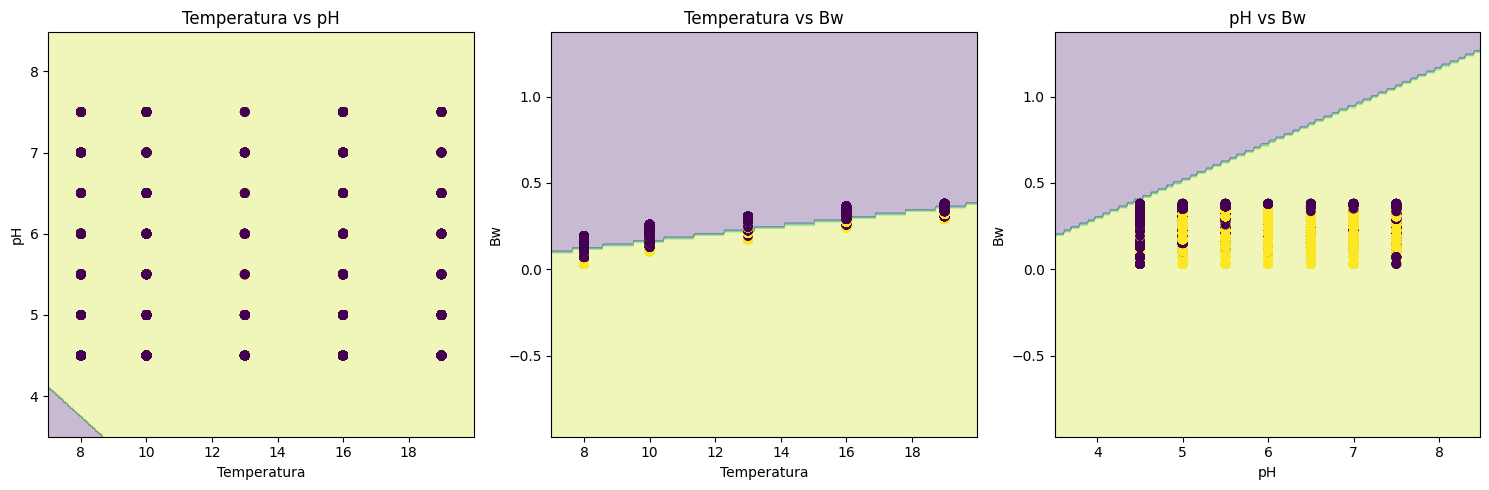

In [31]:
import matplotlib.pyplot as plt
from itertools import combinations

def plot_pairwise_boundaries(X, y, clf, feature_names=None):
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    
    # Get all pairwise combinations of features
    feature_pairs = list(combinations(range(X.shape[1]), 2))
    
    fig, axes = plt.subplots(1, len(feature_pairs), figsize=(15, 5))
    if len(feature_pairs) == 1:
        axes = [axes]
    
    for idx, (i, j) in enumerate(feature_pairs):
        # Extract 2D data
        X_2d = X.iloc[:, [i, j]]
        
        # Train classifier on 2D data
        clf_2d = type(clf)(**clf.get_params())
        clf_2d.fit(X_2d, y)
        
        # Create decision boundary
        h = 0.02
        x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
        y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = clf_2d.predict(mesh_points)
        Z = Z.reshape(xx.shape)
        
        # Plot
        axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        scatter = axes[idx].scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y, cmap='viridis')
        axes[idx].set_xlabel(feature_names[i])
        axes[idx].set_ylabel(feature_names[j])
        axes[idx].set_title(f'{feature_names[i]} vs {feature_names[j]}')
    
    plt.tight_layout()
    plt.show()

# Usage
plot_pairwise_boundaries(X, y, cv_scores_Perceptron["estimator"][0], feature_names = ["Temperatura", "pH", "Bw"])

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LogisticRegression()
model.fit(X_poly, y)

/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
X_poly = pd.DataFrame(poly.fit_transform(X), columns =  poly.get_feature_names_out(['Temperatura', 'pH', 'Bw']))
X_poly

,Crec,Temperatura,pH,Bw,Temperatura^2,Temperatura pH,Temperatura Bw,pH^2,pH Bw,Bw^2
0,1.0,8.0,7.5,0.031623,64.0,60.0,0.252982,56.25,0.237171,0.001
1,1.0,8.0,7.5,0.031623,64.0,60.0,0.252982,56.25,0.237171,0.001
2,1.0,8.0,7.5,0.031623,64.0,60.0,0.252982,56.25,0.237171,0.001
3,1.0,8.0,7.5,0.031623,64.0,60.0,0.252982,56.25,0.237171,0.001
4,1.0,8.0,7.5,0.031623,64.0,60.0,0.252982,56.25,0.237171,0.001
...,...,...,...,...,...,...,...,...,...,...
8605,1.0,19.0,5.0,0.379473,361.0,95.0,7.209993,25.00,1.897367,0.144
8606,1.0,19.0,5.0,0.379473,361.0,95.0,7.209993,25.00,1.897367,0.144
8607,1.0,19.0,5.0,0.379473,361.0,95.0,7.209993,25.00,1.897367,0.144
8608,1.0,19.0,5.0,0.379473,361.0,95.0,7.209993,25.00,1.897367,0.144


In [64]:
# LogRegClassifier

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = pd.DataFrame(poly.fit_transform(X), columns =  poly.get_feature_names_out(['Temperatura', 'pH', 'Bw']))
X_poly.rename(columns={"1":"Crec"}, inplace = True)

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
                df.drop("Crec", axis=1),
                df["Crec"],
                train_size = 0.8,
                random_state = 123,
                shuffle = True
            )

def objective(trial):
        params = {
                "C" : trial.suggest_float('C', 1e-4, 1e4, log=True),
                "penalty" : trial.suggest_categorical('penalty', ['l1', 'l2']),
                "max_iter" : trial.suggest_int('max_iter', 500, 2000),
                "class_weight" : trial.suggest_categorical('class_weight', [None, 'balanced'])
            }


        model = LogisticRegression(
                solver = "saga",
                **params
                )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = roc_auc_score(y_test, predictions)
        return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15, show_progress_bar=False, timeout=60*10)

print('Mejores hiperparámetros:', study.best_params)
print('Mejor score:', study.best_value)

model_best = LogisticRegression(
                solver = "saga",
                **study.best_params)

cv_scores_LogR = cross_validate(model_best, 
                               X = X, 
                               y = y, 
                               cv = cv,
                               scoring = ("roc_auc", "accuracy"),
                               return_estimator = True,   
                               return_indices = True,
                               return_train_score = True,
                               n_jobs = -1
                               )

cv_scores_LogR["test_roc_auc"], cv_scores_LogR["test_accuracy"]

[I 2025-07-08 12:54:45,762] A new study created in memory with name: no-name-2c74859b-c49c-4169-a2b4-0575cf7664cc
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-07-08 12:54:46,015] Trial 0 finished with value: 0.82287309175857 and parameters: {'C': 6.546290539402646, 'penalty': 'l1', 'max_iter': 602, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.82287309175857.
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-07-08 12:54:46,287] Trial 1 finished with value: 0.82287309175857 and parameters: {'C': 422.79717308034344, 'penalty': 'l2', 'max_iter': 660, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.822873091

Mejores hiperparámetros: {'C': 18.85242002833463, 'penalty': 'l1', 'max_iter': 914, 'class_weight': None}
Mejor score: 0.828153691530396


(array([0.9007599 , 0.88931819, 0.88829054, 0.88485407, 0.89054998,
        0.88722293, 0.8973325 , 0.90292592, 0.88807952, 0.87853313]),
 array([0.82984901, 0.81416957, 0.81475029, 0.81939605, 0.80952381,
        0.81881533, 0.81358885, 0.82636469, 0.81358885, 0.79907085]))

/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/meta_die/Documents/repositories/datos_Alberto/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


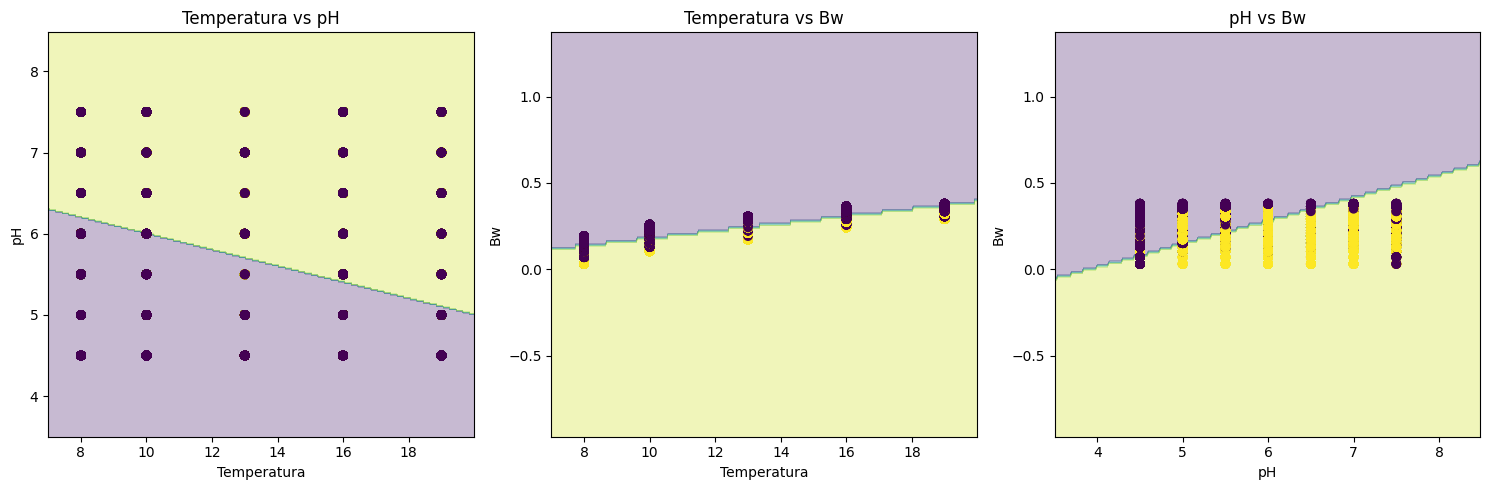

In [68]:
plot_pairwise_boundaries(X, y, cv_scores_LogR["estimator"][7], feature_names=["Temperatura", "pH", "Bw"])